<a href="https://colab.research.google.com/github/estefanialopeez/Actividad4_Extraccion_de_datos/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl


In [ ]:
from google.colab import files
files.upload()

In [6]:
data= pd.read_excel('microretailer_mit_lift_lab.xlsx')
data.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [7]:
data.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 106 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    _record_id                                                  object 
 1    _title                                                      object 
 2    _server_updated_at                                          object 
 3    _updated_by                                                 object 
 4    _geometry                                                   object 
 5    _latitude                                                   float64
 6    _longitude                                                  float64
 7    228_store_name                                              object 
 8    229_store_picture                                           object 
 9    232_type_of_store                                           object 
 10   

In [8]:
# Seleccionar las 20 columnas deseadas para analizar
column_indices = [3, 9, 24, 26, 27, 34, 35, 36, 37, 38, 47, 50, 53, 55, 61, 62, 68, 79, 80, 83]
data20 = data.iloc[:, column_indices]
data20

,_updated_by,232_type_of_store,6_change_employees_average_salary_last_year,49_inventory_records,18_sales_records,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,214_customer_relationship_tools,35_interest_rate,193_sales_planning_tools,60_services,77_delivery_timeslots,79_delivery_vehicle,313_home_deliveries,185_place_orders_suppliers,53_special_conditions_suppliers,277_payment_method_suppliers
0,Salomon Abdala Perez,Tailor,No cambió,Software especializado + computadora,Software especializado + computadora,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,Redes sociales,NaN,Software especializado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Salomon Abdala Perez,Grocery store (aka. nanostore),No cambió,No lo hago,No lo hago,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,NaN,Aplicación móvil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria
2,Salomon Abdala Perez,Grocery store (aka. nanostore),No cambió,En Excel,Software especializado + computadora,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Salomon Abdala Perez,Grocery store (aka. nanostore),No cambió,Software especializado + computadora,Software especializado + computadora,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,Teléfono,NaN,Ninguna,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Salomon Abdala Perez,Grocery store (aka. nanostore),No cambió,En papel,En papel,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Emilio Garza,Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Emilio Garza,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Francisco Adán,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Verificar que el DataFrame generado no cuente con datos faltantes
data20.isnull().sum()

_updated_by                                      0
232_type_of_store                                0
6_change_employees_average_salary_last_year     86
49_inventory_records                            61
18_sales_records                                61
186_internet_connection                         63
210_sales_channels                              89
189_payment_methods                             64
28_prefered_payment_method                     169
31_different_prices_payment_method             164
214_customer_relationship_tools                 76
35_interest_rate                               150
193_sales_planning_tools                        89
60_services                                     94
77_delivery_timeslots                          169
79_delivery_vehicle                            169
313_home_deliveries                            113
185_place_orders_suppliers                     100
53_special_conditions_suppliers                124
277_payment_method_suppliers   

In [14]:
# Rellenar valores faltantes con el valor más frecuente
data20_filled = data20.apply(lambda x: x.fillna(x.value_counts().index[0]))
data20_filled.isnull().sum()

_updated_by                                    0
232_type_of_store                              0
6_change_employees_average_salary_last_year    0
49_inventory_records                           0
18_sales_records                               0
186_internet_connection                        0
210_sales_channels                             0
189_payment_methods                            0
28_prefered_payment_method                     0
31_different_prices_payment_method             0
214_customer_relationship_tools                0
35_interest_rate                               0
193_sales_planning_tools                       0
60_services                                    0
77_delivery_timeslots                          0
79_delivery_vehicle                            0
313_home_deliveries                            0
185_place_orders_suppliers                     0
53_special_conditions_suppliers                0
277_payment_method_suppliers                   0
dtype: int64

##Updated by  : persona que actualiazo la base de datos

In [ ]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table1= freq_tbl(data20_filled['_updated_by'])
table1


,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>(2)]
Filtro1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [ ]:
# Establecer el indice de 'updated_by'
filtro_index1=Filtro1.set_index('_updated_by')
filtro_index1

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


<Axes: ylabel='frequency'>

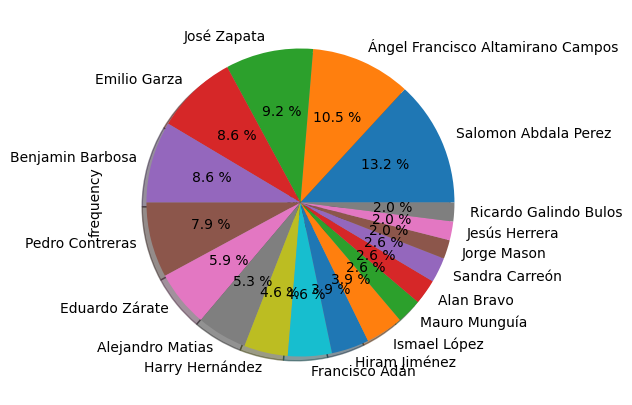

In [ ]:
filtro_index1["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##type_of_store: tipo de tienda

In [ ]:
table2= freq_tbl(data20_filled['232_type_of_store'])
table2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [ ]:
Filtro2= table2[table2['frequency']>(2)]
Filtro2
filtro_index2=Filtro2.set_index('232_type_of_store')
filtro_index2

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427


Text(0, 0.5, 'frecuencia')

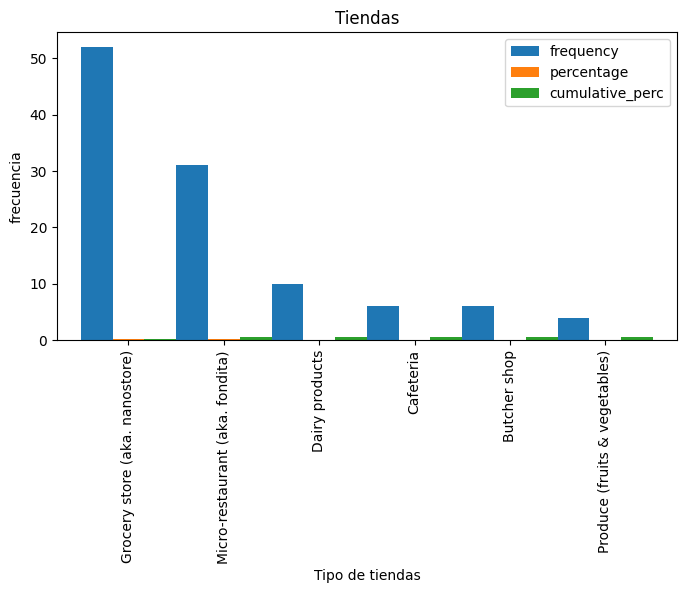

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index2.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('Tiendas')
plt.xlabel('Tipo de tiendas')
plt.ylabel('frecuencia')

## 6_change_employees_average_salary_last_year

In [ ]:
table3= freq_tbl(data20_filled['6_change_employees_average_salary_last_year'])
table3

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,136,0.795322,0.795322
1,Aumentó 15%,14,0.081871,0.877193
2,Disminuyó 15%,5,0.029240,0.906433
3,Aumentó 25%,4,0.023392,0.929825
4,Aumentó 50% o más,4,0.023392,0.953216
5,Disminuyó 25%,3,0.017544,0.970760
6,Dependiente,1,0.005848,0.976608
7,Disminuyó 50% o más,1,0.005848,0.982456
8,0,1,0.005848,0.988304
9,No hay empleándosela,1,0.005848,0.994152


In [ ]:
Filtro3= table3[table3['frequency']>(1)]
Filtro3
filtro_index3=Filtro3.set_index('6_change_employees_average_salary_last_year')
filtro_index3

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,136,0.795322,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216
Disminuyó 25%,3,0.017544,0.970760


<Axes: xlabel='6_change_employees_average_salary_last_year'>

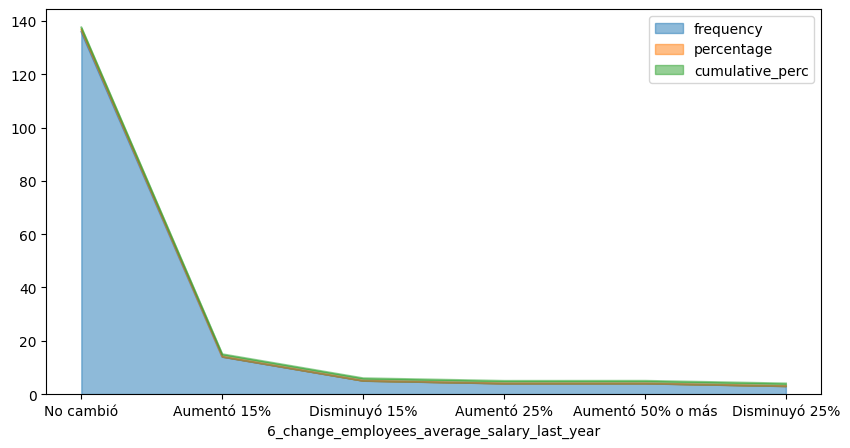

In [ ]:
filtro_index3.plot(kind='area', figsize=(10,5),alpha = 0.5)

##49_inventory_records

In [15]:
table4= freq_tbl(data20_filled['49_inventory_records'])
table4

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,101,0.590643,0.590643
1,Software especializado + computadora,21,0.122807,0.713450
2,En Excel,20,0.116959,0.830409
3,No lo hago,18,0.105263,0.935673
4,"En Excel,En papel",7,0.040936,0.976608
5,Mentalmente,1,0.005848,0.982456
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [16]:
Filtro4= table4[table4['frequency']>(1)]
Filtro4

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,101,0.590643,0.590643
1,Software especializado + computadora,21,0.122807,0.713450
2,En Excel,20,0.116959,0.830409
3,No lo hago,18,0.105263,0.935673
4,"En Excel,En papel",7,0.040936,0.976608


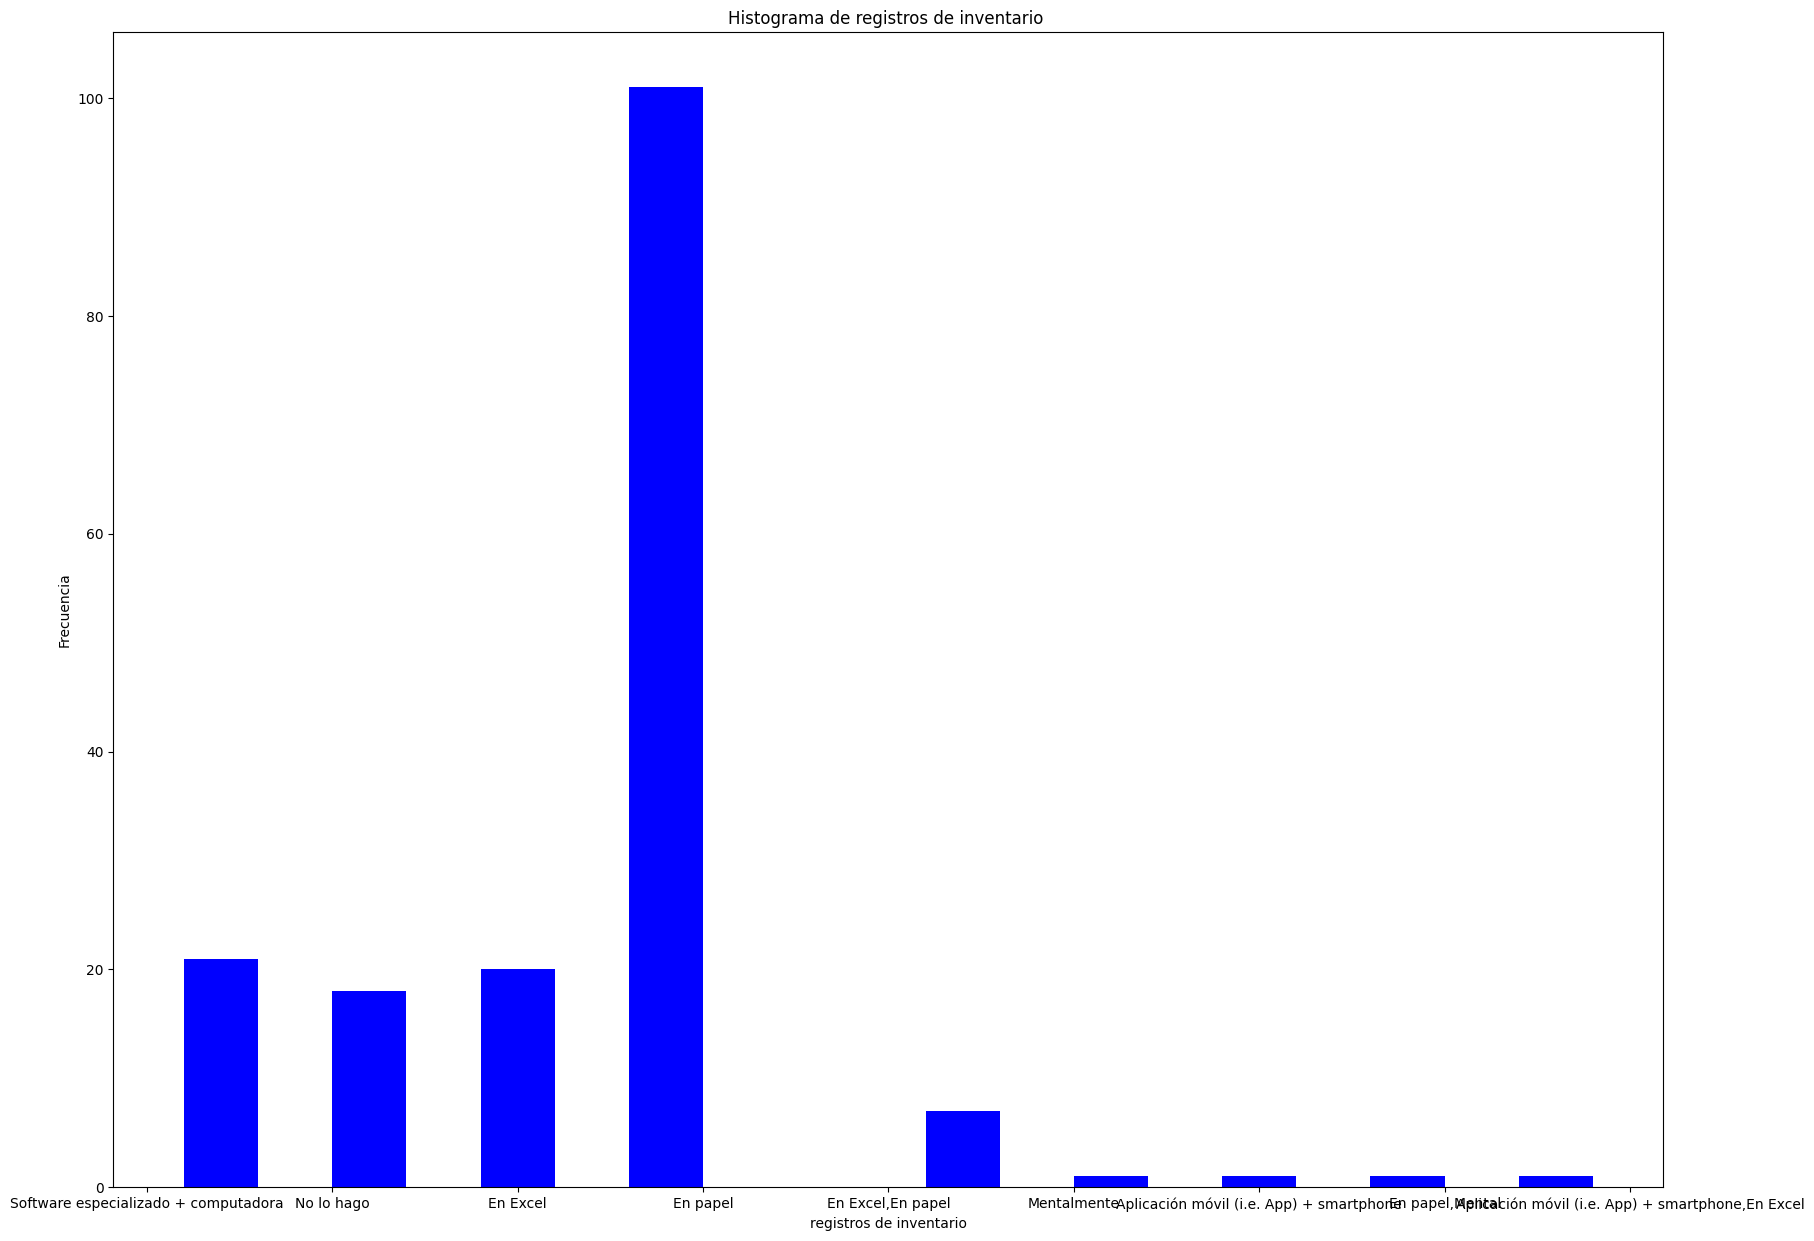

In [17]:
fig=plt.figure(figsize=(20,15))
plt.hist(x=data20_filled ['49_inventory_records'], color= 'blue' , rwidth=0.50)
plt.title('Histograma de registros de inventario ')
plt.xlabel('registros de inventario')
plt.ylabel('Frecuencia')

plt.show()

##18_sales_records


In [18]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table5= freq_tbl(data20_filled['18_sales_records'])
print(table5)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>(1)]
print(Filtro5)



                                     18_sales_records  frequency  percentage  \
0                                            En papel        108    0.631579   
1                Software especializado + computadora         22    0.128655   
2                                          No lo hago         14    0.081871   
3                                            En Excel         10    0.058480   
4                         Caja registradora (análoga)          4    0.023392   
5                                   En Excel,En papel          4    0.023392   
6            Aplicación móvil (i.e. App) + smartphone          1    0.005848   
7   Aplicación móvil (i.e. App) + smartphone,Caja ...          1    0.005848   
8                                           Contadora          1    0.005848   
9                                              Notas           1    0.005848   
10      Caja registradora (análoga),En Excel,En papel          1    0.005848   
11  Aplicación móvil (i.e. App) + smartp

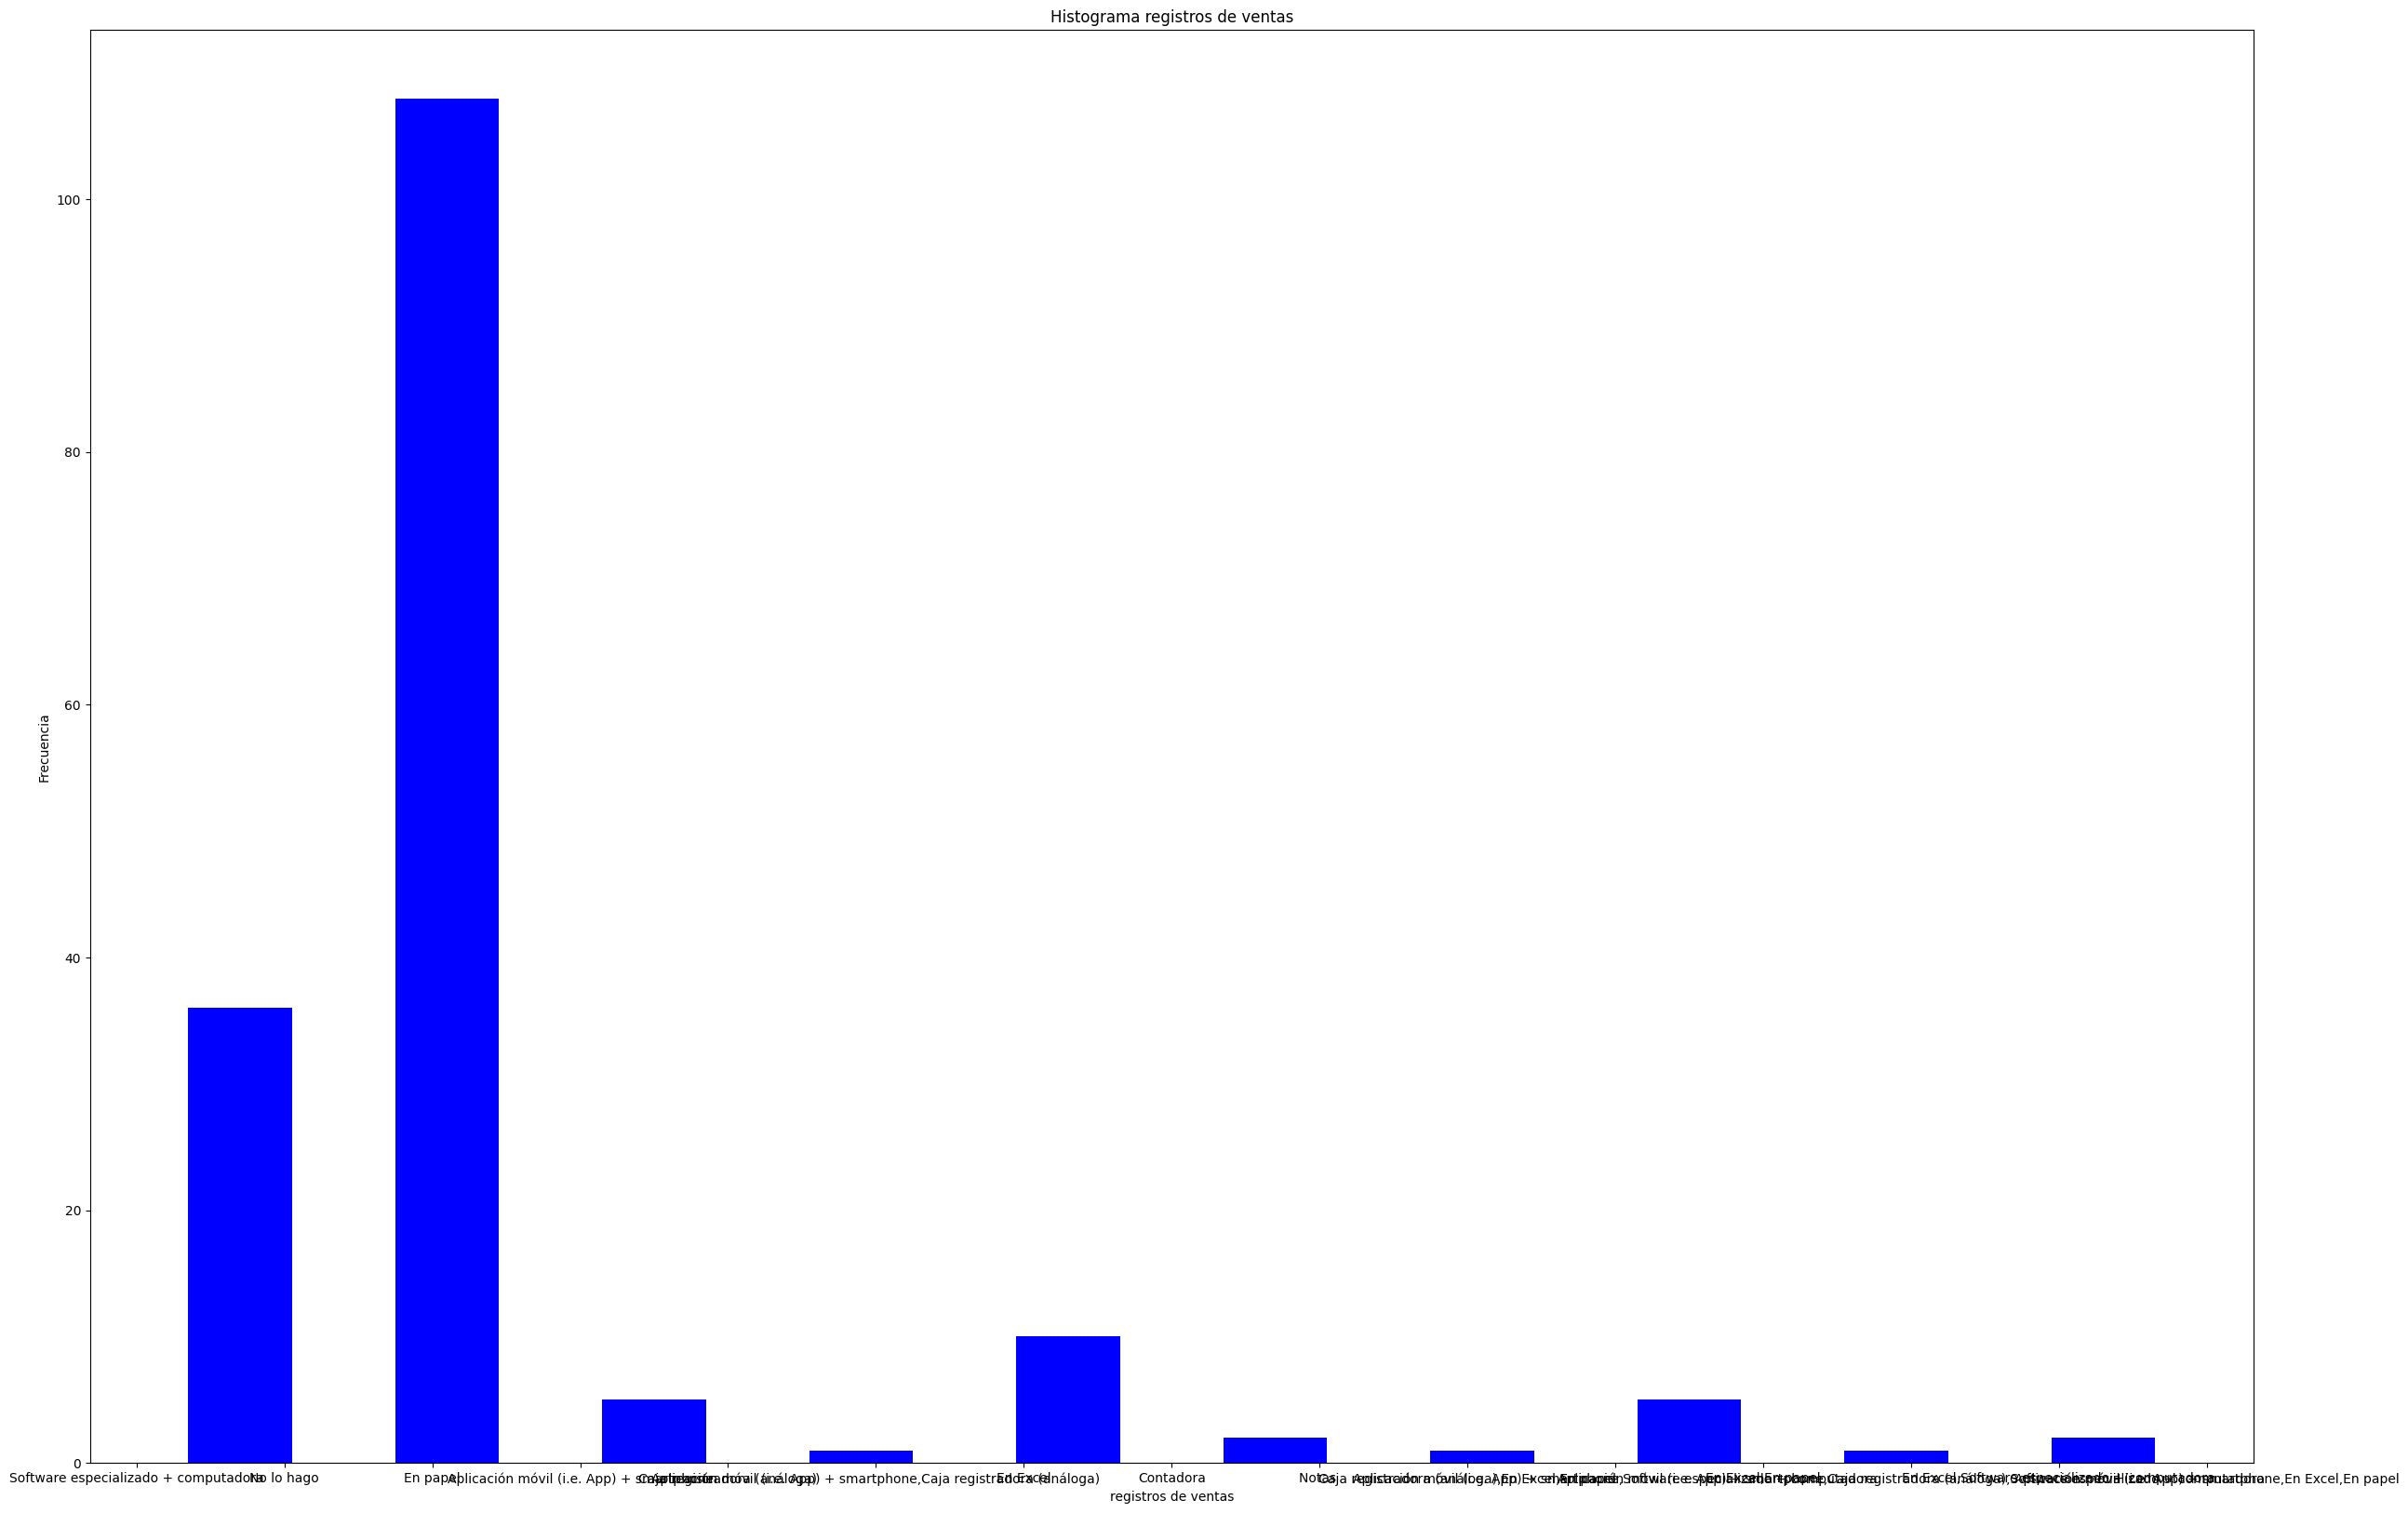

In [19]:
fig=plt.figure(figsize=(30,20))
plt.hist(x=data20_filled ['18_sales_records'], color= 'blue' , rwidth=0.50)
plt.title('Histograma registros de ventas')
plt.xlabel('registros de ventas')
plt.ylabel('Frecuencia')

plt.show()

##186_internet_connection


In [20]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table6= freq_tbl(data20_filled['186_internet_connection'])
print(table6)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro6 = table6[table6['frequency']>(2)]
print(Filtro6)


# Establecer el indice de 'updated_by'
filtro_index6=Filtro6.set_index('186_internet_connection')
print(filtro_index6)


  186_internet_connection  frequency  percentage  cumulative_perc
0                     yes        139    0.812865         0.812865
1                      no         32    0.187135         1.000000
  186_internet_connection  frequency  percentage  cumulative_perc
0                     yes        139    0.812865         0.812865
1                      no         32    0.187135         1.000000
                         frequency  percentage  cumulative_perc
186_internet_connection                                        
yes                            139    0.812865         0.812865
no                              32    0.187135         1.000000


<Axes: ylabel='frequency'>

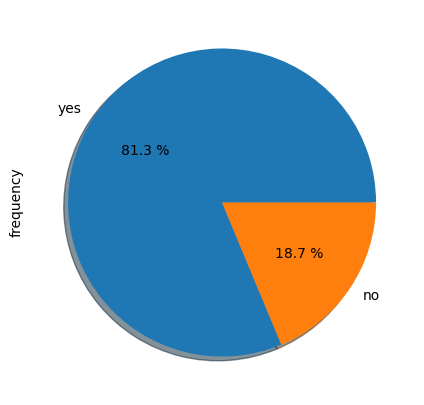

In [ ]:
filtro_index6["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##210_sales_channels


In [ ]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table7= freq_tbl(data20_filled['210_sales_channels'])
print(table7)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro7 = table7[table7['frequency']>(2)]
print(Filtro7)


# Establecer el indice de 'updated_by'
filtro_index7=Filtro7.set_index('210_sales_channels')
print(filtro_index7)

                                   210_sales_channels  frequency  percentage  \
0           Redes sociales (e.g. Facebook, Instagram)        100    0.584795   
1                                            WhatsApp         10    0.058480   
2   Redes sociales (e.g. Facebook, Instagram),What...          9    0.052632   
3                             Llamada a Teléfono fijo          6    0.035088   
4                 Llamada a Teléfono celular,WhatsApp          6    0.035088   
5                          Llamada a Teléfono celular          5    0.029240   
6   Llamada a Teléfono celular,Redes sociales (e.g...          5    0.029240   
7   Llamada a Teléfono celular,Llamada a Teléfono ...          3    0.017544   
8                                             Ninguno          3    0.017544   
9                                   Página web propia          3    0.017544   
10  Llamada a Teléfono celular,Llamada a Teléfono ...          2    0.011696   
11           Aplicación móvil (e.g. Rapp

Text(0, 0.5, 'Frecuencia')

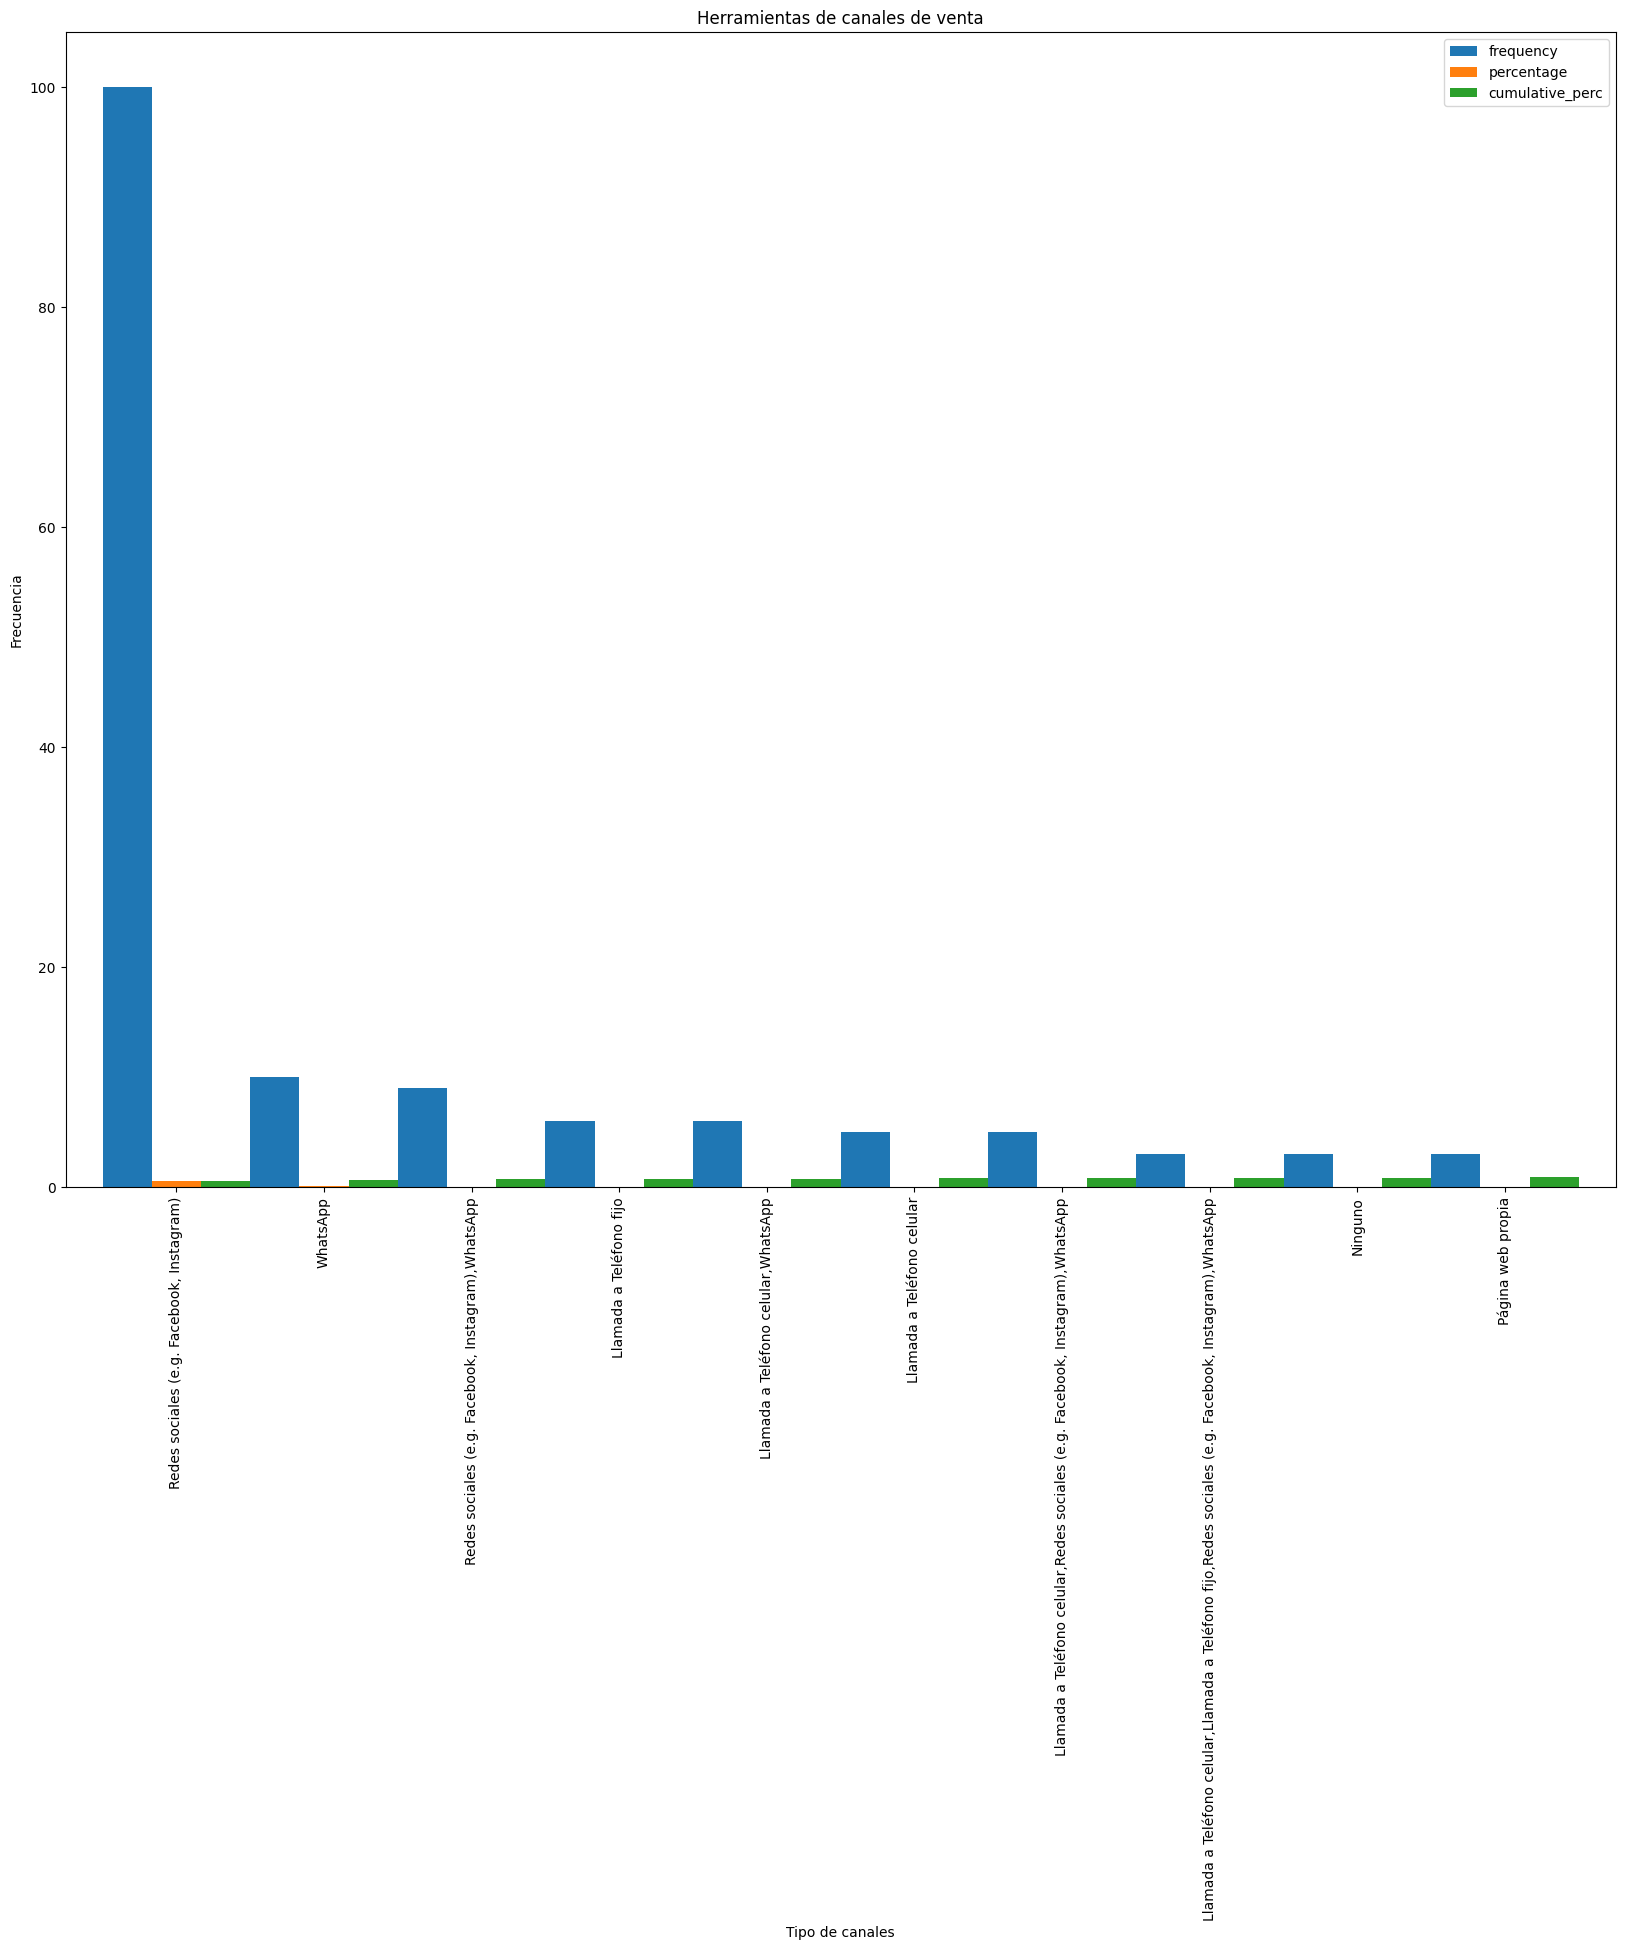

In [ ]:
filtro_index7.plot(kind = 'bar', width=1, figsize=(20,15))
plt.title('Herramientas de canales de venta')
plt.xlabel('Tipo de canales')
plt.ylabel('Frecuencia')

##189_payment_methods


In [22]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table8= freq_tbl(data20_filled['189_payment_methods'])
print(table8)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro8 = table8[table8['frequency']>(2)]
print(Filtro8)


# Establecer el indice de 'updated_by'
filtro_index8=Filtro8.set_index('189_payment_methods')
print(filtro_index8)

                                 189_payment_methods  frequency  percentage  \
0                                           Efectivo        104    0.608187   
1  Efectivo,Tarjeta de débito y/o crédito,Transfe...         30    0.175439   
2             Efectivo,Tarjeta de débito y/o crédito         19    0.111111   
3               Efectivo,Transferencia interbancaria         15    0.087719   
4  Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...          1    0.005848   
5  Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...          1    0.005848   
6                      Tarjeta de débito y/o crédito          1    0.005848   

   cumulative_perc  
0         0.608187  
1         0.783626  
2         0.894737  
3         0.982456  
4         0.988304  
5         0.994152  
6         1.000000  
                                 189_payment_methods  frequency  percentage  \
0                                           Efectivo        104    0.608187   
1  Efectivo,Tarjeta de débito y/o crédito

<Axes: ylabel='frequency'>

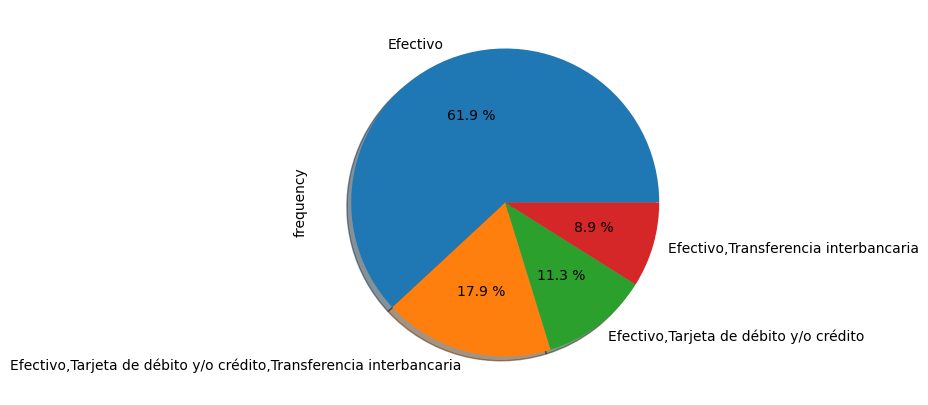

In [27]:
filtro_index8["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##28_prefered_payment_method


In [30]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table9= freq_tbl(data20_filled['28_prefered_payment_method'])
print(table9)



# Establecer el indice de 'updated_by'
filtro_index9=table9.set_index('28_prefered_payment_method')
print(filtro_index9)

      28_prefered_payment_method  frequency  percentage  cumulative_perc
0  Tarjeta de débito y/o crédito        170    0.994152         0.994152
1                       Efectivo          1    0.005848         1.000000
                               frequency  percentage  cumulative_perc
28_prefered_payment_method                                           
Tarjeta de débito y/o crédito        170    0.994152         0.994152
Efectivo                               1    0.005848         1.000000


<Axes: xlabel='28_prefered_payment_method'>

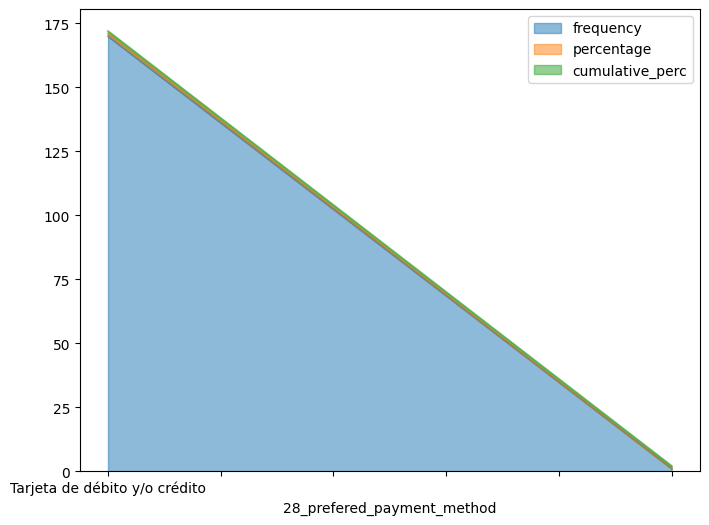

In [35]:
filtro_index9.plot(kind='area', figsize=(8,6),alpha = 0.5)

##31_different_prices_payment_method


In [37]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table10= freq_tbl(data20_filled['31_different_prices_payment_method'])
print(table10)


# Establecer el indice de 'updated_by'
filtro_index10=table10.set_index('31_different_prices_payment_method')
print(filtro_index10)

  31_different_prices_payment_method  frequency  percentage  cumulative_perc
0                                 no        169    0.988304         0.988304
1                                yes          2    0.011696         1.000000
                                    frequency  percentage  cumulative_perc
31_different_prices_payment_method                                        
no                                        169    0.988304         0.988304
yes                                         2    0.011696         1.000000


Text(0, 0.5, 'Frecuencia')

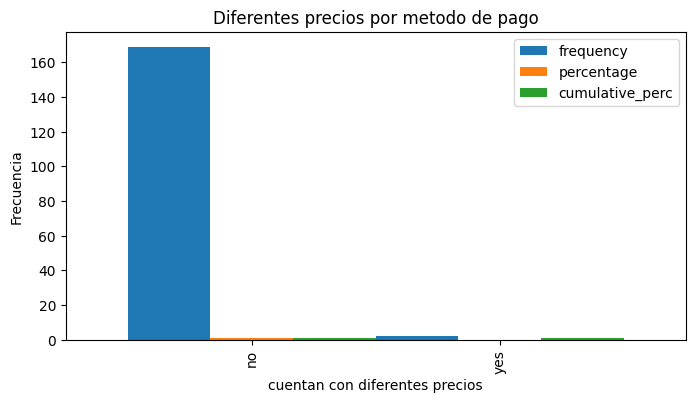

In [39]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index10.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('Diferentes precios por metodo de pago')
plt.xlabel('cuentan con diferentes precios')
plt.ylabel('Frecuencia')

##214_customer_relationship_tools


In [40]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table11= freq_tbl(data20_filled['214_customer_relationship_tools'])
print(table11)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro11 = table11[table11['frequency']>(2)]
print(Filtro11)


# Establecer el indice de 'updated_by'
filtro_index11=Filtro11.set_index('214_customer_relationship_tools')
print(filtro_index11)

    214_customer_relationship_tools  frequency  percentage  cumulative_perc
0                    Redes sociales        103    0.602339         0.602339
1                  Aplicación móvil         21    0.122807         0.725146
2                           Ninguna         20    0.116959         0.842105
3   Aplicación móvil,Redes sociales         13    0.076023         0.918129
4                          Cuaderno          6    0.035088         0.953216
5                          Teléfono          1    0.005848         0.959064
6           Cuaderno,Redes sociales          1    0.005848         0.964912
7        Aplicación móvil,De frente          1    0.005848         0.970760
8                           Físico           1    0.005848         0.976608
9          Aplicación móvil,Ninguna          1    0.005848         0.982456
10                    publicidades           1    0.005848         0.988304
11                       Publicidad          1    0.005848         0.994152
12          

<Axes: ylabel='frequency'>

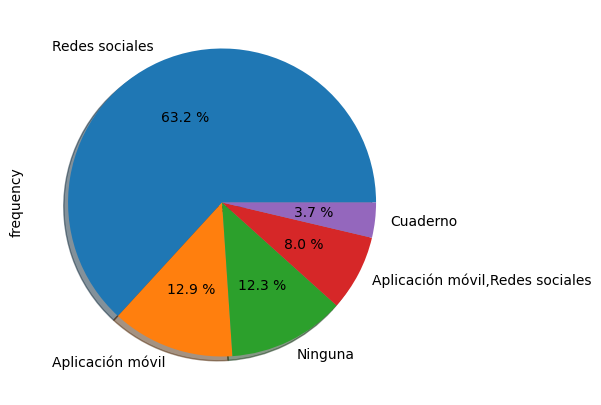

In [43]:
filtro_index11["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


##35_interest_rate


In [45]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table12= freq_tbl(data20_filled['35_interest_rate'])
print(table12)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro12 = table12[table12['frequency']>(1)]
print(Filtro12)


# Establecer el indice de 'updated_by'
filtro_index12=Filtro12.set_index('35_interest_rate')
print(filtro_index12)

  35_interest_rate  frequency  percentage  cumulative_perc
0               no        171         1.0              1.0
  35_interest_rate  frequency  percentage  cumulative_perc
0               no        171         1.0              1.0
                  frequency  percentage  cumulative_perc
35_interest_rate                                        
no                      171         1.0              1.0


<Axes: ylabel='frequency'>

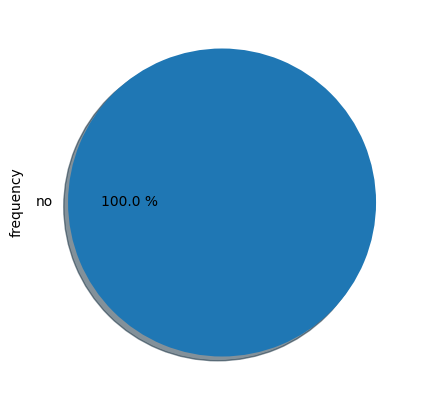

In [46]:
filtro_index12["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

##193_sales_planning_tools


In [47]:
# Conocer la frecuencia de los datos de la primeda columa seleccionada
table13= freq_tbl(data20_filled['193_sales_planning_tools'])
print(table13)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro13 = table13[table13['frequency']>(1)]
print(Filtro13)


# Establecer el indice de 'updated_by'
filtro_index13=Filtro13.set_index('193_sales_planning_tools')
print(filtro_index13)

                   193_sales_planning_tools  frequency  percentage  \
0                                   Ninguna        122    0.713450   
1                                  Cuaderno         21    0.122807   
2                    Software especializado          6    0.035088   
3                                     Excel          6    0.035088   
4                            Cuaderno,Excel          3    0.017544   
5                          Cuaderno,Ninguna          2    0.011696   
6                                     Other          1    0.005848   
7                                    Mental          1    0.005848   
8                      Por temporada de pan          1    0.005848   
9                            Sobre demanda           1    0.005848   
10  Aplicación móvil,Software especializado          1    0.005848   
11             Excel,Software especializado          1    0.005848   
12                                Catálogo           1    0.005848   
13                  

Text(0, 0.5, 'Frecuencia')

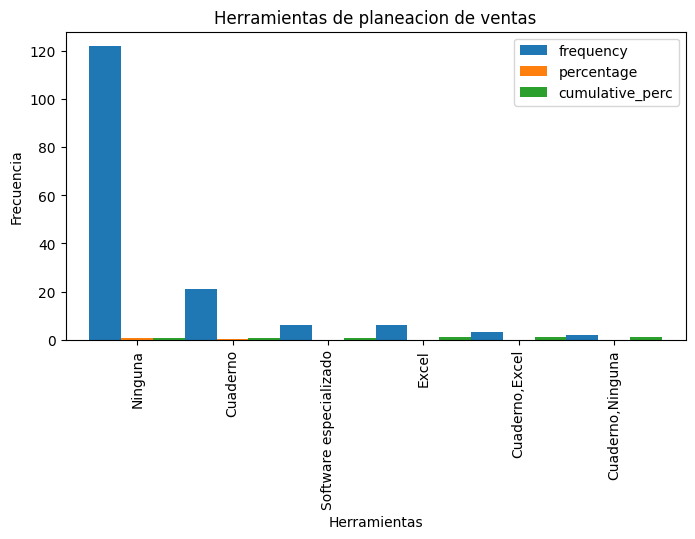

In [49]:
#Realizamos grafico de barras del dataframe filtrado
filtro_index13.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('Herramientas de planeacion de ventas')
plt.xlabel('Herramientas')
plt.ylabel('Frecuencia')

##60_services


In [50]:
table14= freq_tbl(data20_filled['60_services'])
print(table14)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro14 = table14[table14['frequency']>(1)]
print(Filtro14)


# Establecer el indice de 'updated_by'
filtro_index14=Filtro14.set_index('60_services')
print(filtro_index14)

                                          60_services  frequency  percentage  \
0                                             Ninguno        138    0.807018   
1                                 Entrega a domicilio         15    0.087719   
2                                  Recarga telefónica          7    0.040936   
3   Entrega a domicilio,Pago de servicios públicos...          2    0.011696   
4              Entrega a domicilio,Recarga telefónica          2    0.011696   
5                                Toma de papa nicolau          1    0.005848   
6                                      Renta de local          1    0.005848   
7                                               venta          1    0.005848   
8   Entrega a domicilio,Recarga telefónica,Recepci...          1    0.005848   
9   Entrega a domicilio,Pago de servicios públicos...          1    0.005848   
10  Pago de servicios públicos (e.g. Yastas),Recar...          1    0.005848   
11  Recepción y entrega de paquetes (e.g

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

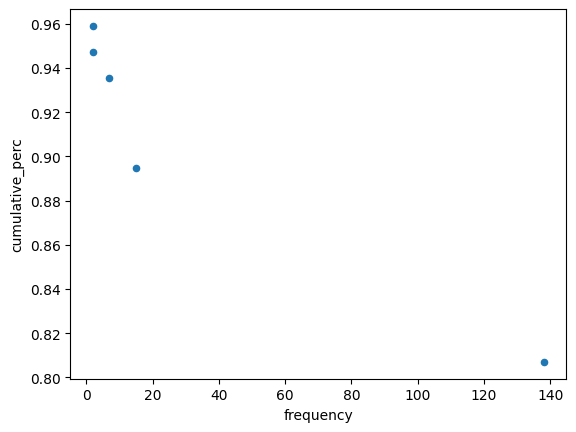

In [52]:
filtro_index14.plot("frequency", "cumulative_perc", kind="scatter")

##77_delivery_timeslots


In [54]:
table15= freq_tbl(data20_filled['77_delivery_timeslots'])
print(table15)

# Establecer el indice de 'updated_by'
filtro_index15=table15.set_index('77_delivery_timeslots')
print(filtro_index15)

     77_delivery_timeslots  frequency  percentage  cumulative_perc
0  Tarde (12:00 - 7:00 pm)        171         1.0              1.0
                         frequency  percentage  cumulative_perc
77_delivery_timeslots                                          
Tarde (12:00 - 7:00 pm)        171         1.0              1.0


<Axes: ylabel='frequency'>

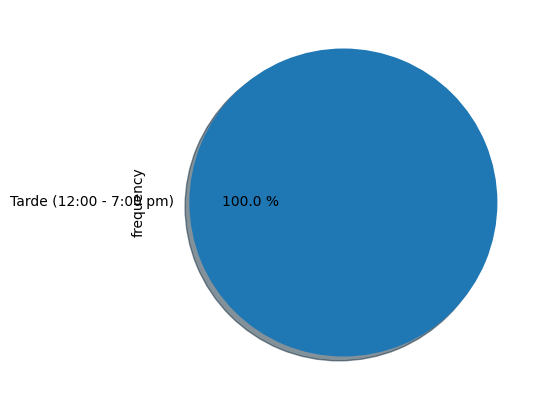

In [56]:
filtro_index15["frequency"].plot(kind='pie', figsize=(15,5), shadow=True, autopct="%0.1f %%")

##79_delivery_vehicle


In [58]:
table16= freq_tbl(data20_filled['79_delivery_vehicle'])
print(table16)



# Establecer el indice de 'updated_by'
filtro_index16=table16.set_index('79_delivery_vehicle')
print(filtro_index16)

               79_delivery_vehicle  frequency  percentage  cumulative_perc
0  El cliente los recoge en tienda        170    0.994152         0.994152
1                        Automóvil          1    0.005848         1.000000
                                 frequency  percentage  cumulative_perc
79_delivery_vehicle                                                    
El cliente los recoge en tienda        170    0.994152         0.994152
Automóvil                                1    0.005848         1.000000


<Axes: ylabel='frequency'>

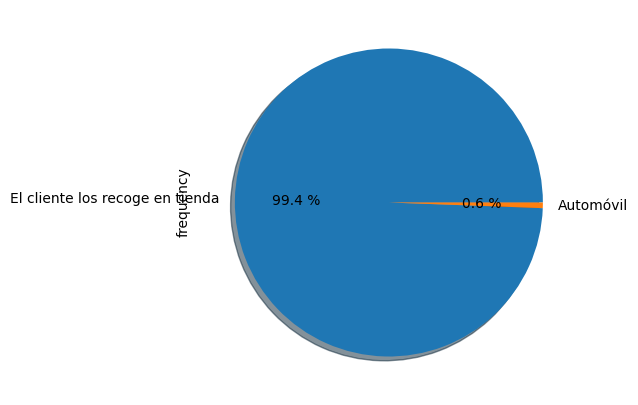

In [59]:
filtro_index16["frequency"].plot(kind='pie', figsize=(15,5), shadow=True, autopct="%0.1f %%")

##313_home_deliveries


In [61]:
table17= freq_tbl(data20_filled['313_home_deliveries'])
print(table17)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro17 = table17[table17['frequency']>(1)]
print(Filtro17)


# Establecer el indice de 'updated_by'
filtro_index17=Filtro17.set_index('313_home_deliveries')
print(filtro_index17)

              313_home_deliveries  frequency  percentage  cumulative_perc
0        Totalmente en desacuerdo        138    0.807018         0.807018
1           Totalmente de acuerdo         14    0.081871         0.888889
2                 Algo de acuerdo         11    0.064327         0.953216
3              Algo en desacuerdo          5    0.029240         0.982456
4  Ni de acuerdo ni en desacuerdo          3    0.017544         1.000000
              313_home_deliveries  frequency  percentage  cumulative_perc
0        Totalmente en desacuerdo        138    0.807018         0.807018
1           Totalmente de acuerdo         14    0.081871         0.888889
2                 Algo de acuerdo         11    0.064327         0.953216
3              Algo en desacuerdo          5    0.029240         0.982456
4  Ni de acuerdo ni en desacuerdo          3    0.017544         1.000000
                                frequency  percentage  cumulative_perc
313_home_deliveries                      

<Axes: ylabel='frequency'>

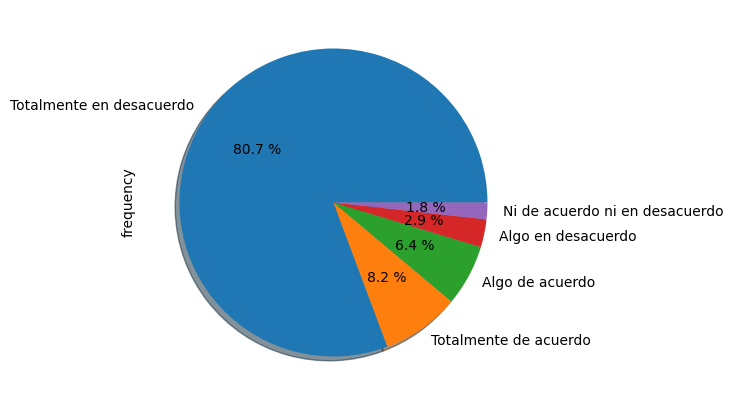

In [62]:
filtro_index17["frequency"].plot(kind='pie', figsize=(15,5), shadow=True, autopct="%0.1f %%")

##185_place_orders_suppliers


In [63]:
table18= freq_tbl(data20_filled['185_place_orders_suppliers'])
print(table18)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro18 = table18[table18['frequency']>(1)]
print(Filtro18)


# Establecer el indice de 'updated_by'
filtro_index18=Filtro18.set_index('185_place_orders_suppliers')
print(filtro_index18)

                           185_place_orders_suppliers  frequency  percentage  \
0                                          En persona        120    0.701754   
1              Mensajería instantánea (e.g. WhatsApp)          8    0.046784   
2   En persona,Llamada telefónica,Mensajería insta...          7    0.040936   
3                                  Llamada telefónica          6    0.035088   
4   En persona,Mensajería instantánea (e.g. WhatsApp)          5    0.029240   
5                            Página web del proveedor          5    0.029240   
6                       En persona,Llamada telefónica          5    0.029240   
7   Mensaje de texto (SMS),Mensajería instantánea ...          2    0.011696   
8                 En persona,Página web del proveedor          2    0.011696   
9                              Mensaje de texto (SMS)          2    0.011696   
10  Llamada telefónica,Mensajería instantánea (e.g...          1    0.005848   
11                                     C

Text(0.5, 1.0, 'proveedores de pedidos realizados')

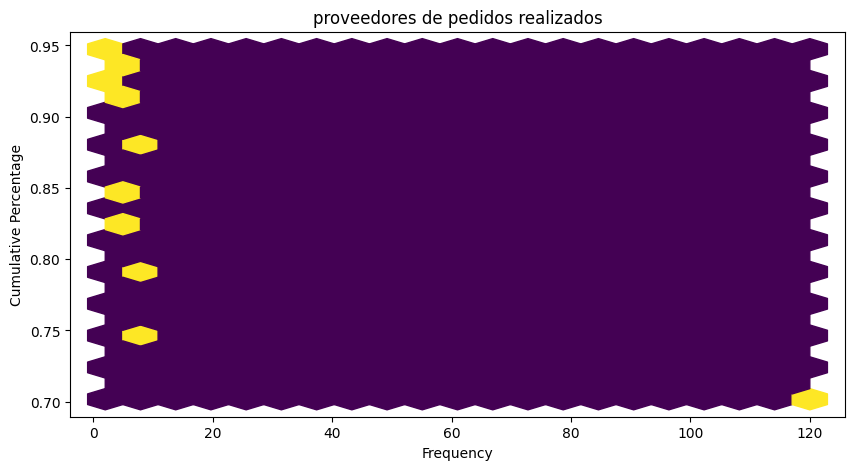

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
hb = ax.hexbin(filtro_index18["frequency"], filtro_index18["cumulative_perc"], gridsize=20)

# Agregar etiquetas a los ejes x e y
ax.set_xlabel("Frequency")
ax.set_ylabel("Cumulative Percentage")
plt.title("proveedores de pedidos realizados")


##53_special_conditions_suppliers


In [69]:
table19= freq_tbl(data20_filled['53_special_conditions_suppliers'])
print(table19)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro19 = table19[table19['frequency']>(1)]
print(Filtro19)


# Establecer el indice de 'updated_by'
filtro_index19=Filtro19.set_index('53_special_conditions_suppliers')
print(filtro_index19)

                      53_special_conditions_suppliers  frequency  percentage  \
0                                             Crédito        133    0.777778   
1                   Descuento por compras anticipadas          9    0.052632   
2           Crédito,Descuento por compras anticipadas          4    0.023392   
3                                             Ninguno          4    0.023392   
4   Consignación,Crédito,Descuento por compras ant...          4    0.023392   
5                                        Consignación          2    0.011696   
6                                             ninguno          2    0.011696   
7                                            Recompra          1    0.005848   
8          Descuento por compras anticipadas,Recompra          1    0.005848   
9                                            Ninguna           1    0.005848   
10                                        Promociones          1    0.005848   
11     Consignación,Descuento por compra

<Axes: ylabel='frequency'>

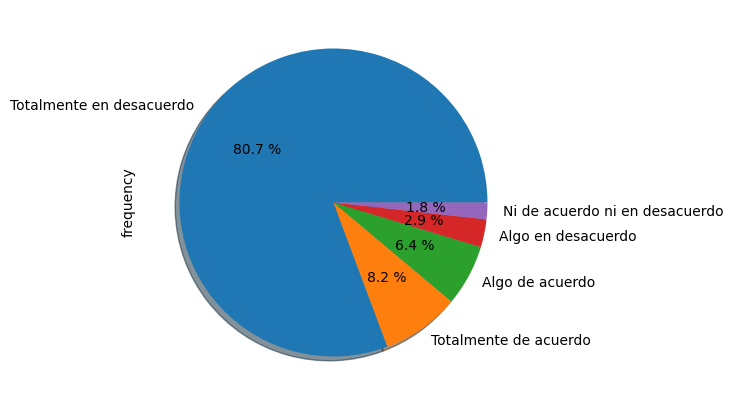

In [73]:
filtro_index17["frequency"].plot(kind='pie', figsize=(15,5), shadow=True, autopct="%0.1f %%")

##277_payment_method_suppliers

In [74]:
table20= freq_tbl(data20_filled['277_payment_method_suppliers'])
print(table20)

#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro20 = table20[table20['frequency']>(1)]
print(Filtro20)


# Establecer el indice de 'updated_by'
filtro_index20=Filtro20.set_index('277_payment_method_suppliers')
print(filtro_index20)

                        277_payment_method_suppliers  frequency  percentage  \
0                                           Efectivo        146    0.853801   
1               Efectivo,Transferencia interbancaria          8    0.046784   
2                        Transferencia interbancaria          7    0.040936   
3             Efectivo,Tarjeta de débito y/o crédito          4    0.023392   
4                      Tarjeta de débito y/o crédito          4    0.023392   
5  Efectivo,Tarjeta de débito y/o crédito,Transfe...          2    0.011696   

   cumulative_perc  
0         0.853801  
1         0.900585  
2         0.941520  
3         0.964912  
4         0.988304  
5         1.000000  
                        277_payment_method_suppliers  frequency  percentage  \
0                                           Efectivo        146    0.853801   
1               Efectivo,Transferencia interbancaria          8    0.046784   
2                        Transferencia interbancaria          

Text(0, 0.5, 'Frecuencia')

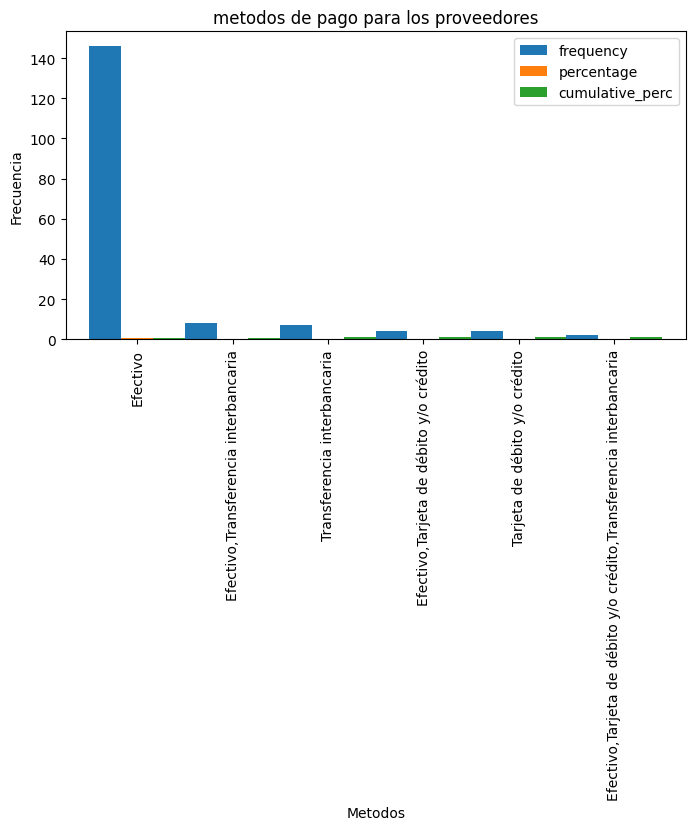

In [75]:
filtro_index20.plot(kind = 'bar', width=1, figsize=(8,4))
plt.title('metodos de pago para los proveedores')
plt.xlabel('Metodos')
plt.ylabel('Frecuencia')